In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Road_Accident_Aalysis_project/US_Accidents_March23.csv'

In [4]:
accidents_df = pd.read_csv(file_path, nrows=100000)

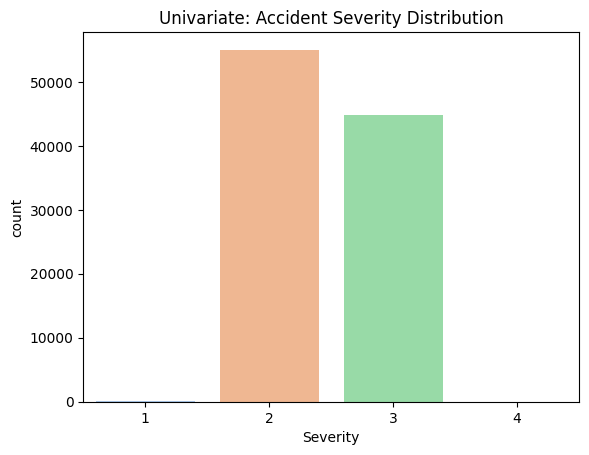

In [5]:
sns.countplot(x='Severity', data=accidents_df, palette='pastel')
plt.title('Univariate: Accident Severity Distribution')
plt.show()

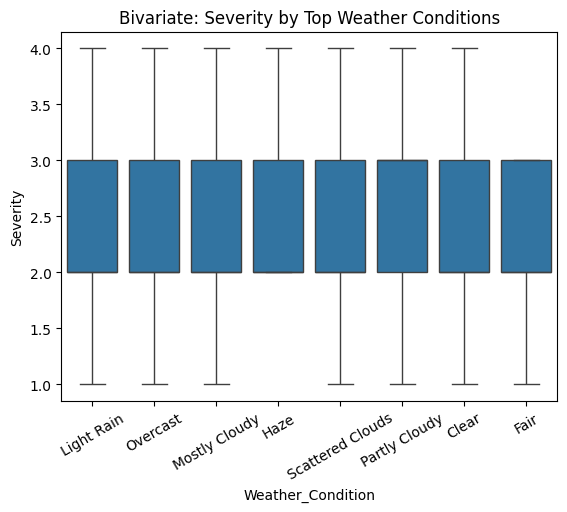

In [6]:
# --- BIVARIATE ANALYSIS ---
# Relationship between Severity and Weather_Condition (categorical vs. categorical)
top_weather = accidents_df['Weather_Condition'].value_counts().nlargest(8)
sns.boxplot(x='Weather_Condition', y='Severity',
            data=accidents_df[accidents_df['Weather_Condition'].isin(top_weather.index)])
plt.title('Bivariate: Severity by Top Weather Conditions')
plt.xticks(rotation=30)
plt.show()

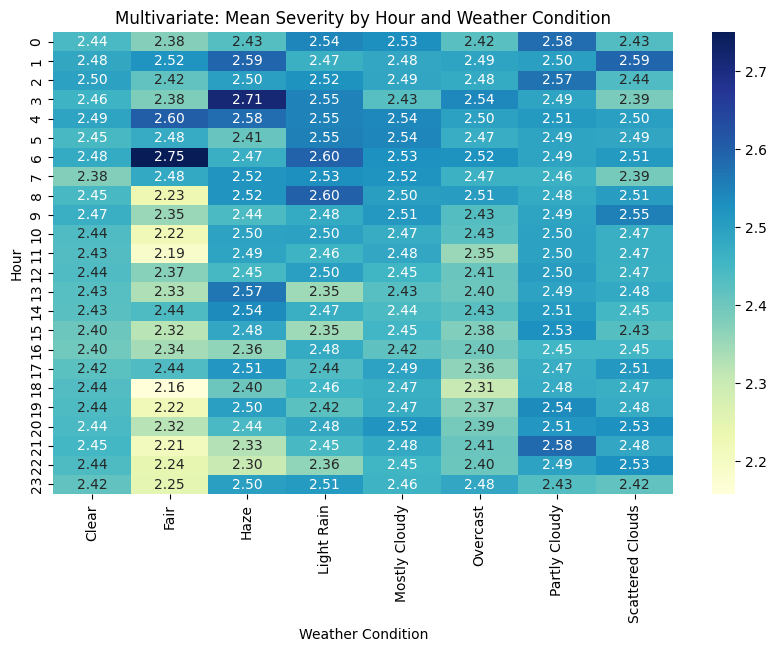

In [7]:
# --- MULTIVARIATE ANALYSIS ---
# Severity by Hour and Top Weather Conditions (heatmap)
if 'Hour' not in accidents_df:
    accidents_df['Hour'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce').dt.hour
pivot = accidents_df[accidents_df['Weather_Condition'].isin(top_weather.index)].pivot_table(
    values='Severity', index='Hour', columns='Weather_Condition', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Multivariate: Mean Severity by Hour and Weather Condition')
plt.ylabel('Hour')
plt.xlabel('Weather Condition')
plt.show()

In [8]:
# --- Summary statistics for all numerical columns ---
print("Summary statistics for numerical columns:")
display(accidents_df.describe().T)

Summary statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Severity,100000.0,2.448120,0.499931,1.000000,2.000000,2.000000,3.000000,4.000000
Start_Lat,100000.0,35.630369,2.101259,32.542587,33.957775,34.168579,37.776682,41.428753
Start_Lng,100000.0,-119.322756,3.663525,-123.813927,-121.828468,-118.384232,-117.916023,-81.550728
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),100000.0,0.011345,0.262244,0.000000,0.000000,0.000000,0.010000,51.130000
Temperature(F),98409.0,66.641262,12.703846,3.200000,57.900000,66.000000,75.000000,114.100000
Wind_Chill(F),4322.0,48.845812,19.898270,-8.400000,37.100000,42.500000,63.000000,107.000000
Humidity(%),98144.0,59.794170,23.184442,4.000000,43.000000,62.000000,78.000000,100.000000
Pressure(in),98708.0,29.961021,0.275672,2.980000,29.890000,29.970000,30.060000,33.040000


In [9]:
# --- Additional statistics: median for each numerical column ---
print("\nMedian values for numerical columns:")
display(accidents_df.median(numeric_only=True))


Median values for numerical columns:


,0
Severity,2.000000
Start_Lat,34.168579
Start_Lng,-118.384232
End_Lat,NaN
End_Lng,NaN
Distance(mi),0.000000
Temperature(F),66.000000
Wind_Chill(F),42.500000
Humidity(%),62.000000
Pressure(in),29.970000



Severity value counts:
Severity
1       98
2    55025
3    44844
4       33
Name: count, dtype: int64


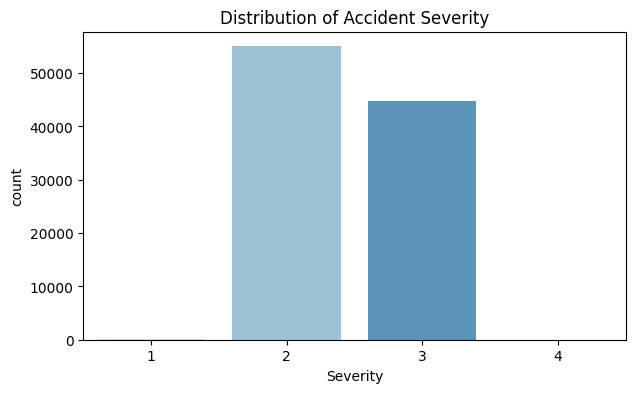

In [10]:
# --- Explore distributions and ranges for key features ---

# 1. Severity
print("\nSeverity value counts:")
print(accidents_df['Severity'].value_counts().sort_index())

plt.figure(figsize=(7, 4))
sns.countplot(x='Severity', data=accidents_df, palette='Blues')
plt.title('Distribution of Accident Severity')
plt.show()

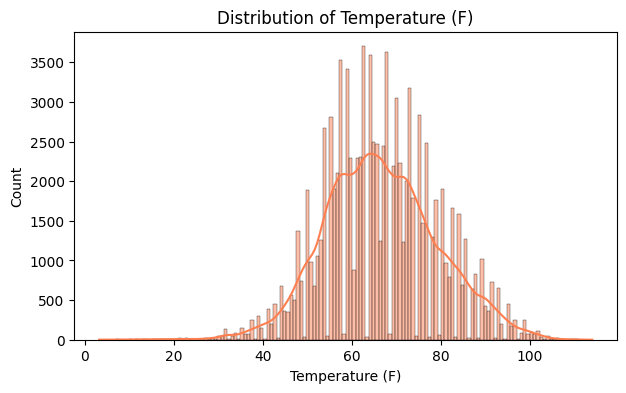

Temperature (F): min = 3.2 | max = 114.1


In [11]:
# 2. Temperature
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Temperature(F)'].dropna(), kde=True, color='coral')
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature (F)')
plt.show()
print("Temperature (F): min =", accidents_df['Temperature(F)'].min(),
      "| max =", accidents_df['Temperature(F)'].max())

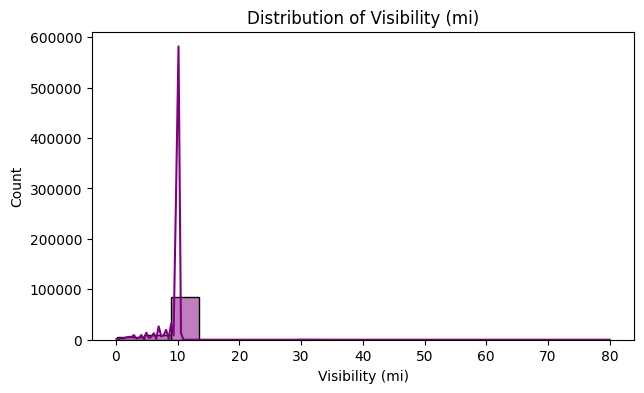

Visibility (mi): min = 0.1 | max = 80.0


In [12]:
# 3. Visibility
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Visibility(mi)'].dropna(), kde=True, color='purple')
plt.title('Distribution of Visibility (mi)')
plt.xlabel('Visibility (mi)')
plt.show()
print("Visibility (mi): min =", accidents_df['Visibility(mi)'].min(),
      "| max =", accidents_df['Visibility(mi)'].max())

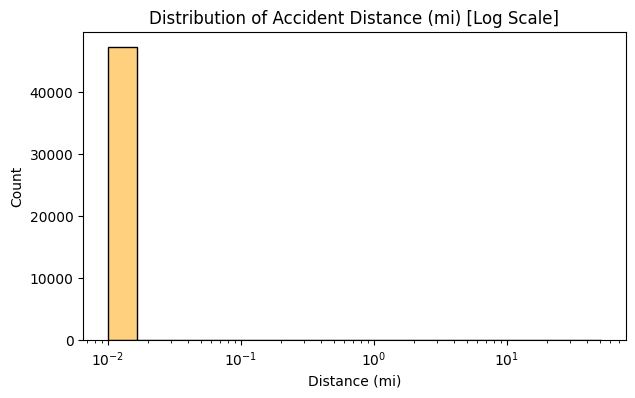

Distance (mi): min = 0.0 | max = 51.13


In [13]:

# 4. Distance
plt.figure(figsize=(7, 4))
# Use log scale due to highly skewed distance distribution
sns.histplot(accidents_df['Distance(mi)'].dropna(), kde=True, color='orange', log_scale=True)
plt.title('Distribution of Accident Distance (mi) [Log Scale]')
plt.xlabel('Distance (mi)')
plt.show()
print("Distance (mi): min =", accidents_df['Distance(mi)'].min(),
      "| max =", accidents_df['Distance(mi)'].max())


Most frequent Weather Conditions:
Weather_Condition
Clear               57255
Overcast            10255
Mostly Cloudy        8829
Partly Cloudy        8260
Scattered Clouds     5684
Light Rain           3211
Haze                 2097
Fair                 1039
Rain                  829
Heavy Rain            202
Name: count, dtype: int64


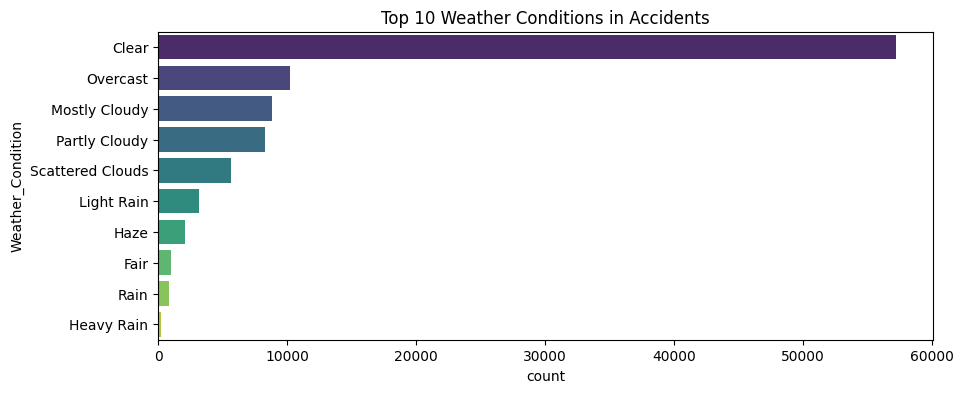

In [14]:
# 5. Explore Weather Condition categories
print("\nMost frequent Weather Conditions:")
print(accidents_df['Weather_Condition'].value_counts(dropna=True).head(10))

plt.figure(figsize=(10, 4))
sns.countplot(y='Weather_Condition', data=accidents_df,
              order=accidents_df['Weather_Condition'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Weather Conditions in Accidents')
plt.show()

In [15]:
# 6. Explore distribution over latitude and longitude (range)
print("\nLatitude range:", accidents_df['Start_Lat'].min(), "to", accidents_df['Start_Lat'].max())
print("Longitude range:", accidents_df['Start_Lng'].min(), "to", accidents_df['Start_Lng'].max())


Latitude range: 32.542587 to 41.428753
Longitude range: -123.813927 to -81.550728
